In [1]:
import cv2 
import pytesseract


custom_config = r'-c preserve_interword_spaces=1 --oem 1 --psm 1 -l eng+ita'

extracted_text  = cv2.imread('OCR/Image_files/2img/2img.png',config=custom_config)
print(extracted_text)

# saving to a txt file

with open("referto.txt", "w") as text_file:
    text_file.write(extracted_text)

TypeError: 'config' is an invalid keyword argument for imread()

In [7]:
import pytesseract
from pytesseract import Output
from PIL import Image
import pandas as pd

custom_config = r'-c preserve_interword_spaces=1 --oem 1 --psm 1 -l eng+ita'
d = pytesseract.image_to_data(Image.open("C:/Users/admin/Downloads/temp.jpg"), config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

# clean up blanks
df1 = df[(df.conf!='-1')&(df.text!=' ')&(df.text!='')]
# sort blocks vertically
sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num']==block]
    sel = curr[curr.text.str.len()>3]
    char_w = (sel.width/sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left']/char_w > prev_left + 1:
            added = int((ln['left'])/char_w) - prev_left
            text += ' ' * added 
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)


   


    Smart Agriculture 


      Budget  Implementation — Breakout Session 2 (24"" Fe 


   


    Emerging  Hi-tech & Digital Agri’Ecos 


             Chair: 


           Mr Kailash Choudhary, Hon'ble MoS(Agri) 
           Moderator: 


           +  Mr. J.N Swain, Secretary, Dept. of Fisheries 
           +  Mr. Manoj Ahuja, OSD, DA&FW 
           Rapporteurs: 
              1. Dr Pramod Meherda, JS(IT) 
             2. Ms Shomita Biswas, JS(M&T) 
             3. Dr J Balaji, JS(Fisheries) 
             4. Dr Anil Rai, ADG(ICT), ICAR 



In [1]:
from deepdoctection.analyzer import get_dd_analyzer
analyzer=get_dd_analyzer()
    

[1008 16:24.23 @file_utils.py:33]  INF  PyTorch version 1.12.1+cu113 available.
d:\cis_dev\cis-server\venv\lib\site-packages\weasyprint\text\fonts.py:60: UserWarning: FontConfig cannot load default config file. Expect ugly output.
  warn('FontConfig cannot load default config file. Expect ugly output.')
[1008 16:24.25 @dd.py:266]  INF  Config: 
 {'CONFIG': {'D2CELL': 'dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml',
            'D2ITEM': 'dd/d2/item/CASCADE_RCNN_R_50_FPN_GN.yaml',
            'D2LAYOUT': 'dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml',
            'TESS_OCR': 'dd/conf_tesseract.yaml',
            'TPCELL': 'dd/tp/conf_frcnn_cell.yaml',
            'TPITEM': 'dd/tp/conf_frcnn_rows.yaml',
            'TPLAYOUT': 'dd/tp/conf_frcnn_layout.yaml'},
 'DEVICE': 'gpu',
 'LANG': None,
 'LIB': 'pt',
 'OCR': True,
 'SEGMENTATION': {'ASSIGNMENT_RULE': 'ioa',
                  'FULL_TABLE_TILING': True,
                  'IOA_THRESHOLD_COLS': 0.4,
                  'IOA_THRESHOLD_ROWS': 0.4,

[1008 16:24.31 @config.py:66]  WRN  Loading config C:\Users\admin\.cache\deepdoctection\configs\dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[1008 16:24.32 @checkpoint.py:150]  INF  [Checkpointer] Loading from C:\Users\admin\.cache\deepdoctection\weights\cell/d2_model_1849999_cell_inf_only.pt ...
[1008 16:24.32 @c2_model_loading.py:324]  INF  Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                               | Shapes                          |
|:------------------------------------------------|:------------------------------------------------------------------|:--------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.weight,weight}    | (128,) (128,) (128,64,1,1)      |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_

[1008 16:24.35 @config.py:66]  WRN  Loading config C:\Users\admin\.cache\deepdoctection\configs\dd/d2/item/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[1008 16:24.35 @checkpoint.py:150]  INF  [Checkpointer] Loading from C:\Users\admin\.cache\deepdoctection\weights\item/d2_model_1639999_item_inf_only.pt ...
[1008 16:24.35 @c2_model_loading.py:324]  INF  Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                               | Shapes                          |
|:------------------------------------------------|:------------------------------------------------------------------|:--------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.weight,weight}    | (128,) (128,) (128,64,1,1)      |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_

In [2]:
df=analyzer.analyze(path="OCR/PDF_files/IntReport/IntReport.pdf")
df.reset_state()
doc=iter(df)

result = []

In [3]:
page = next(doc)
image=page.viz()

[1008 16:24.44 @doctectionpipe.py:110]  INF  Processing IntReport_0.pdf
d:\cis_dev\cis-server\venv\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[1008 16:24.47 @context.py:131]  INF  ImageLayoutService finished, 3.6676 sec.
[1008 16:24.47 @context.py:131]  INF  SubImageLayoutService finished, 0.2038 sec.
[1008 16:24.48 @context.py:131]  INF  SubImageLayoutService finished, 0.1677 sec.
[1008 16:24.48 @context.py:131]  INF  TableSegmentationService finished, 0.0207 sec.
[1008 16:24.48 @context.py:131]  INF  TableSegmentationRefinementService finished, 0.0081 sec.
[1008 16:24.49 @context.py:131]  INF  TextExtractionService finished, 1.1007 sec.
[1008 16:24.49 @context.py:131]  INF  Matchi

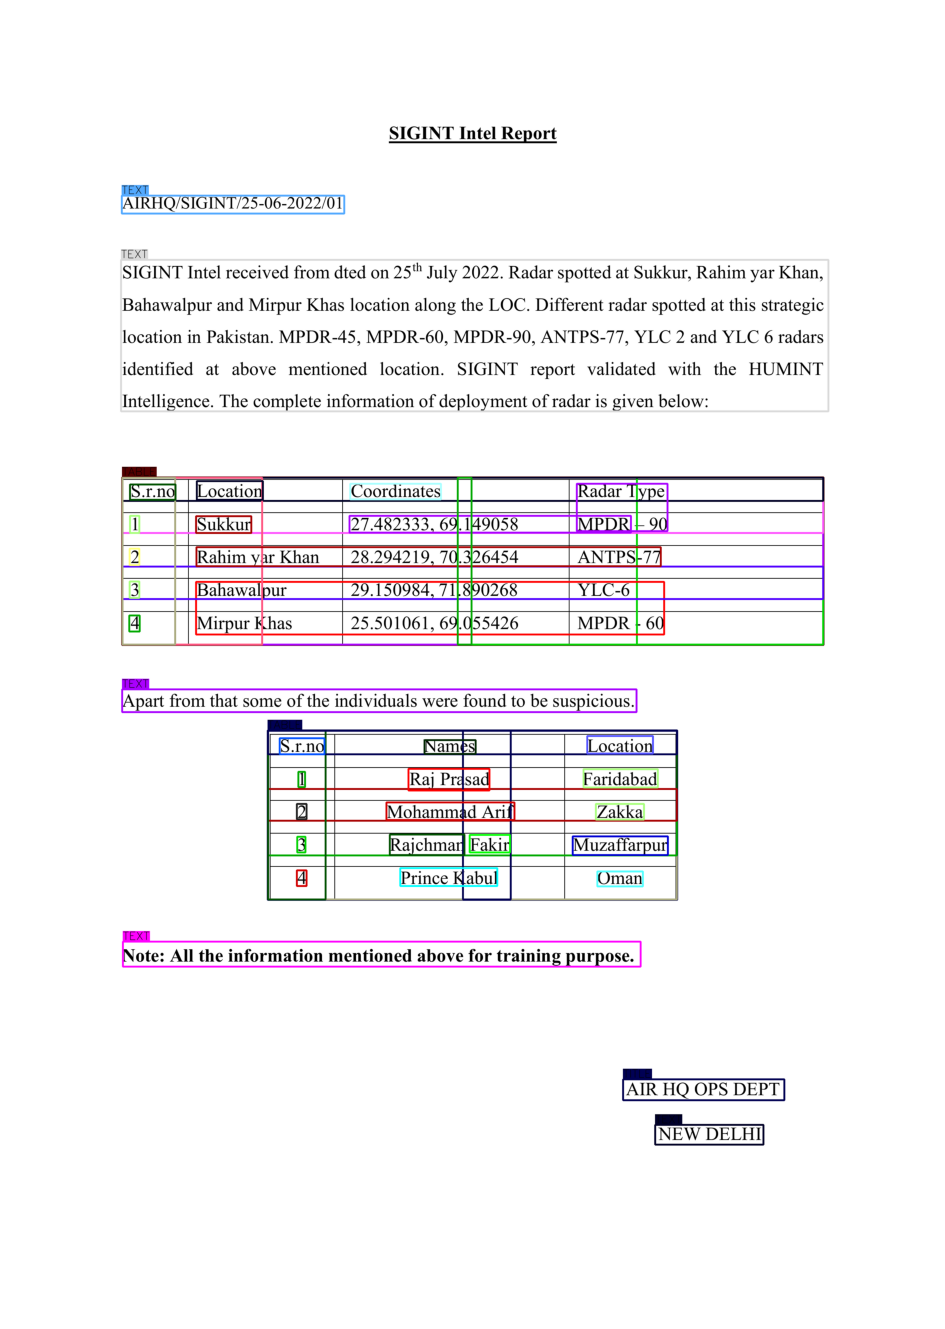

In [4]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [11]:
text=page.get_text()
text

'\nAIRHQ/SIGINT/25-06-2022/01\nSIGINT Intel received from dted on 25" July 2022. Radar spotted at Sukkur, Rahim yar Khan, Bahawalpur and Mirpur Khas location along the LOC. Different radar spotted at this strategic location in Pakistan. MPDR-45, MPDR-60, MPDR-90, ANTPS-77, YLC 2 and YLC 6 radars identified at above mentioned location. SIGINT report validated with the HUMINT Intelligence. The complete information of deployment of radar is given below\nApart from that some of the individuals were found to be suspicious.\nNote: All the information mentioned above for training purpose.\nAIR HQ OPS DEPT\nNEW DELHI'

In [7]:
len(page.tables)

1

In [10]:
from IPython.core.display import HTML
HTML(page.tables[0].html)

In [50]:
page.save(path='OCR.JSON')

In [90]:
# image=page.viz(show_words=True)
image=page.viz()

In [80]:
print(page.tables[0].html)

<table><tr><td>Seno</td><td>Location Rahim yar Khan Bahawalpur Mirpur Khas</td><td>Coordinates TAI, OO 28294219, 70326454. 9.1SO9RF, TL OOIER TS SOTOGT, OO0SSEI-</td><td>Radar Type MPDR—90 ANTPSA7 YICe MPDR- 60</td></tr></table>


In [88]:
import re
s = r"C:\Users\Josh\Desktop"
re.escape(s)


C:\User@s\Josh\Desktop
C:\\User@s\\Josh\\Desktop


In [59]:
import json
import glob

result=[]
for f in glob.glob("OCR/PDF_files/neW/*.json"):
    with open(f,'r+') as infile:
        result.append(json.load(infile))
        
# with open('merged_file.json','w') as outfile:
#     json.dump(result,outfile,sort_keys=True)
print(result)

[{'uuid': '87a8859c-85cf-3460-abdb-bf2e7eedf6a0', 'file_name': 'new_0.pdf', 'location': 'OCR/PDF_files/new/new.pdf\\new_0.pdf', 'width': 2481, 'height': 3508, 'language': None, 'document_type': None, 'layouts': [{'uuid': '20e36730-5e0c-35ba-87e6-ed30fadb6031', 'layout_type': 'TEXT', 'reading_order': 1, 'score': 0.8371862769126892, 'bounding_box': [270.0, 3343.0, 1484.0, 3398.0], 'words': [{'uuid': '55d7867f-c9dc-394a-a160-bed38f902ed9', 'bounding_box': [271.0, 3358.0, 310.0, 3384.0], 'text': 'M:', 'reading_order': 1, 'token_class': None, 'tag': None}, {'uuid': '667ff77d-eb81-3ca2-8df2-bc10e53cf67b', 'bounding_box': [323.0, 3356.0, 379.0, 3384.0], 'text': '+91', 'reading_order': 2, 'token_class': None, 'tag': None}, {'uuid': 'c2cc3686-af0b-31e6-8d94-12c3d1652db6', 'bounding_box': [394.0, 3356.0, 496.0, 3384.0], 'text': '91734', 'reading_order': 3, 'token_class': None, 'tag': None}, {'uuid': '548114ff-4387-3ea9-9414-e4d88e704a6e', 'bounding_box': [506.0, 3356.0, 611.0, 3385.0], 'text': '

In [178]:
def json_extract(obj, key):
    """Recursively fetch values from nested JSON."""
    arr = []
    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values


In [4]:
import json
with open('OCR/PDF_files/Ministry_ppt_0/Ministry_ppt_0_7.json') as f:
    data = json.load(f)

for items in data['layouts']:
    for keywords in items['words']:
         for cellvalues in keywords['cells']:
            for value in cellvalues['words']:
                print(value)

KeyError: 'cells'

In [1]:
####mainnnnnnnnnn#################################################
import json
with open('OCR/PDF_files/Ministry_ppt_0/Ministry_ppt_0_7.json','r') as f:
    data = json.load(f)


for item in data['layouts']:
    for keywords in item['words']:
        keywords['text'] = keywords['text'].replace("'", "''")
        print(keywords['text'])
        
try:
    for cellvalues in item['cells']:
        for value in cellvalues['words']:
            value['text']=value['text'].replace("'", "''")
    #       print(value['text'])

finally:
    with open('aa.json', 'w') as f:
        json.dump(data, f)

SyntaxError: invalid syntax (667116732.py, line 14)

In [7]:
import json
with open('OCR/PDF_files/Ministry_ppt_0/Ministry_ppt_0_0.json','r') as f:
    data = json.load(f)
for k,v in data.items():
    print(v)

8841233c-eec4-3e37-a8d7-3dfafe3652fb
Ministry_ppt_0_0.pdf
OCR/PDF_files/Ministry_ppt_0/Ministry_ppt_0.pdf\Ministry_ppt_0_0.pdf
4000
2250
None
None
[{'uuid': '580b673e-7e0e-3279-bc5f-30c7564b7f8a', 'layout_type': 'TITLE', 'reading_order': 3, 'score': 0.9311742782592773, 'bounding_box': [385.0, 1340.0, 714.0, 1429.0], 'words': [{'uuid': '27f60fae-5d18-3f72-95bc-2793ad27e38f', 'bounding_box': [392.0, 1362.0, 703.0, 1411.0], 'text': 'Moderator:', 'reading_order': 1, 'token_class': None, 'tag': None}]}, {'uuid': 'b952a092-94e5-32f0-8a4a-2bd51957158e', 'layout_type': 'LIST', 'reading_order': 4, 'score': 0.7978584170341492, 'bounding_box': [388.0, 1472.0, 1414.0, 1673.0], 'words': [{'uuid': '9ded7cc3-f785-39fc-9599-6008864560ed', 'bounding_box': [390.0, 1500.0, 407.0, 1517.0], 'text': '¢', 'reading_order': 1, 'token_class': None, 'tag': None}, {'uuid': '23167219-6c4b-35cb-80b0-83ff224c1645', 'bounding_box': [467.0, 1484.0, 549.0, 1532.0], 'text': 'Mr.', 'reading_order': 2, 'token_class': None

In [6]:
for item in data['layouts']:
    for keywords in item['words']:
        keywords['text'] = keywords['text'].replace("'", "''")
#         print(keywords['text'])
for celllues in item['cells']:
        for value in celllues['words']:
            value['text']=value['text'].replace("'", "''")
            print(value['text'])

KeyError: 'cells'

In [3]:
with open('aa.json', 'w') as f:
    json.dump(data, f)

In [16]:
for cem in data['layouts']:
    if 'TABLE' in cem['layout_type']:
        for item in data['layouts']:
            for keywords in item['words']:
                keywords['text'] = keywords['text'].replace("'", "''")
                print(keywords['text'])
        try:
            for cellvalues in item['cells']:
                for value in cellvalues['words']:
                    value['text']=value['text'].replace("'", "''")
                    print(value['text'])
        except:
            for cellvalues in item['cells']:
                for value in cellvalues['words']:
                    value['text']=value['text'].replace("'", "''")
                    print(value['text'])
    else:
        for item in data['layouts']:
            for keywords in item['words']:
                keywords['text'] = keywords['text'].replace("'", "''")
                print(keywords['text'])

Moderator:
¢
Mr.
J.N
Swain,
Secretary,
Dept.
¢
Mr.
Manoj
Ahuja,
OSD,
DA&FW
1.
Dr
Pramod
Meherda,
JS(IT)
2.
Ms
Shomita
Biswas,
JS(M&T)
3.
Dr
J
Balaji,
JS(Fisheries)
4.
Dr
Anil
Rai,
ADG(ICT),
ICAR
Rapporteurs:
Mr
Kailash
Choudhary,
Hon’ble
MoS(Agri)
Chair:
Moderator:
¢
Mr.
J.N
Swain,
Secretary,
Dept.
¢
Mr.
Manoj
Ahuja,
OSD,
DA&FW
1.
Dr
Pramod
Meherda,
JS(IT)
2.
Ms
Shomita
Biswas,
JS(M&T)
3.
Dr
J
Balaji,
JS(Fisheries)
4.
Dr
Anil
Rai,
ADG(ICT),
ICAR
Rapporteurs:
Mr
Kailash
Choudhary,
Hon’ble
MoS(Agri)
Chair:
Moderator:
¢
Mr.
J.N
Swain,
Secretary,
Dept.
¢
Mr.
Manoj
Ahuja,
OSD,
DA&FW
1.
Dr
Pramod
Meherda,
JS(IT)
2.
Ms
Shomita
Biswas,
JS(M&T)
3.
Dr
J
Balaji,
JS(Fisheries)
4.
Dr
Anil
Rai,
ADG(ICT),
ICAR
Rapporteurs:
Mr
Kailash
Choudhary,
Hon’ble
MoS(Agri)
Chair:
Moderator:
¢
Mr.
J.N
Swain,
Secretary,
Dept.
¢
Mr.
Manoj
Ahuja,
OSD,
DA&FW
1.
Dr
Pramod
Meherda,
JS(IT)
2.
Ms
Shomita
Biswas,
JS(M&T)
3.
Dr
J
Balaji,
JS(Fisheries)
4.
Dr
Anil
Rai,
ADG(ICT),
ICAR
Rapporteurs:
Mr
Kailash
Choudhary,
Hon’b

In [107]:
#########08-10-2022
import json
with open('OCR/PDF_files/Ministry_ppt_0_1/Ministry_ppt_0_7.json','r') as f:
    data = json.load(f)
Layout=data['layouts']
for i in Layout:
    sublayout=Layout[i]['cells']
#     print(sublayout)
#     Layout[1]['cells'][1]['words'][1]['text']

TypeError: list indices must be integers or slices, not dict

In [5]:
import psycopg2
from config import config
def get_db_connection():
    params = config()
    conn = psycopg2.connect(**params)
    return conn
conn = get_db_connection()
cur = conn.cursor()
cur.execute(
            '''SELECT raw_text, raw_table  from users_file_metadata WHERE upload_id={} order by meta_id ASC'''.format(
                92))
rows = cur.fetchall()

[('\ntance and reduced the choices of herbicides to use [4,5]. Figure 1 illustrates the herbicides usage in controlling weeds for each continent in percentage.\nFigure 1. The herbicides usage in controlling weeds by continent from 1990 to 2019.\nIt is necessary to construct systematic and strategic planning to improve the precision agriculture (PA) sector, especially in weed management, to control and increase yield production, leading to a better economy for the country and farmers. Therefore, remote sensing-based techniques were used to construct and optimize weed management. Remote sensing is a comprehensive framework that monitors and captures earth surface images without direct contact with it. In PA sectors, the data gathered can be used in various applications, such as monitoring rice’s morphology [6], yield estimation [7], and mapping irrigated areas for food security and water resource management [8]. However, even though remote sensing has been widely used in weed management,